In [36]:
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [37]:
tests = 10
episodes = 100000

#### Ordinary importance sampling

In [38]:
FIRST_VISIT = False

ord_v_values = []

for tests in tqdm(range(tests)):

    ord_v_values_ = []
    returns = [[]]

    for episode in range(episodes):

        states = []
        rewards = []
        W_ = []

        state = 0
        done = False

        while not done:
            action = np.random.choice([0, 1], p=[0.5, 0.5])
            if action == 0:
                if np.random.rand() < 0.1:
                    next_state = 1
                    reward = 1
                    done = True
                    W_.append(2)
                else:
                    next_state = 0
                    reward = 0
                    done = False
                    W_.append(2)

            if action == 1:
                next_state = 1
                reward = 0
                done = True
                W_.append(0)
            
            states.append(state)
            rewards.append(reward)

            state = next_state

        G = 0
        W = 1
        for i in reversed(range(len(states))):
            G = G + rewards[i]
            if not FIRST_VISIT or states[i] not in states[:i]:
                W *= W_[i]
                returns[states[i]].append(W*G)
        
        ord_v_values_.append(np.mean(returns[0]))
    ord_v_values.append(ord_v_values_)

100%|██████████████████████████████████████████| 10/10 [23:44<00:00, 142.49s/it]


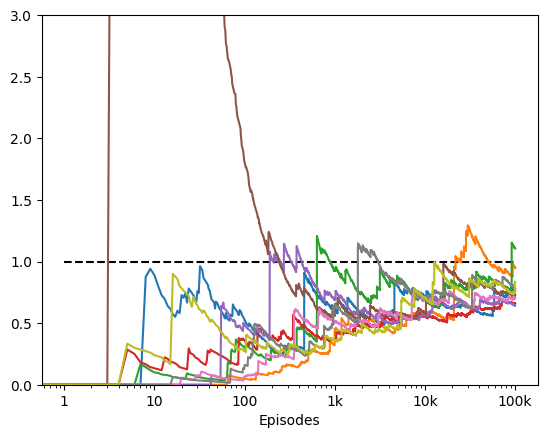

In [39]:
plt.plot([1, episodes], [1, 1], 'k--')
for i in range(tests):
    plt.plot(ord_v_values[i])

plt.xlabel('Episodes')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000, 100000], ['1', '10', '100', '1k', '10k', '100k'])
plt.ylim(0, 3)
plt.show()

#### Weighted importance sampling

In [40]:
FIRST_VISIT = False

wei_v_values = []

for tests in tqdm(range(tests)):

    wei_v_values_ = []
    returns = [[]]

    sum_W = [0]

    for episode in range(episodes):

        states = []
        rewards = []
        W_ = []

        state = 0
        done = False

        while not done:
            action = np.random.choice([0, 1], p=[0.5, 0.5])
            if action == 0:
                if np.random.rand() < 0.1:
                    next_state = 1
                    reward = 1
                    done = True
                    W_.append(2)
                else:
                    next_state = 0
                    reward = 0
                    done = False
                    W_.append(2)

            if action == 1:
                next_state = 1
                reward = 0
                done = True
                W_.append(0)
            
            states.append(state)
            rewards.append(reward)

            state = next_state

        G = 0
        W = 1
        for i in reversed(range(len(states))):
            G = G + rewards[i]
            if not FIRST_VISIT or states[i] not in states[:i]:
                W *= W_[i]
                sum_W[states[i]] += W
                returns[states[i]].append(W*G)
        
        wei_v_values_.append(np.sum(returns[0])/(sum_W[0]+1e-6))
    wei_v_values.append(wei_v_values_)

100%|████████████████████████████████████████████| 9/9 [20:59<00:00, 139.91s/it]


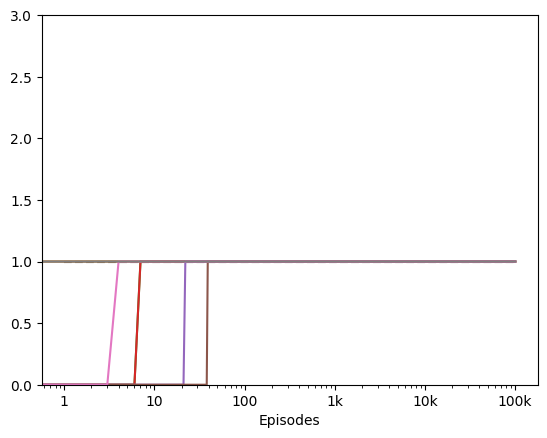

In [41]:
plt.plot([1, episodes], [1, 1], 'k--')
for i in range(tests):
    plt.plot(wei_v_values[i])

plt.xlabel('Episodes')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000, 100000], ['1', '10', '100', '1k', '10k', '100k'])
plt.ylim(0, 3)
plt.show()